<a href="https://colab.research.google.com/github/Marcos314/TCC_2020/blob/master/binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificação binária usando os meus dados (Blood)

In [ ]:
import os
import zipfile

local_zip = '/content/train.zip' # Caminho referente ao local onde os dados são armazenados quando é feito o upload manualmente
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

local_zip = '/content/valid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


In [ ]:
# Directory with our training dandelion pictures
train_eosinophil_dir = os.path.join('/content/train/eosinophil')

# Directory with our training grass pictures
train_neutrophil_dir = os.path.join('/content/train/neutrophil')

# Directory with our validation dandelion pictures
valid_eosinophil_dir = os.path.join('/content/valid/eosinophil')

# Directory with our validation grass pictures
valid_neutrophil_dir = os.path.join('/content/valid/neutrophil')

In [ ]:
train_eosinophil_names = os.listdir(train_eosinophil_dir)
print(train_eosinophil_names[:10])

train_neutrophil_names = os.listdir(train_neutrophil_dir)
print(train_eosinophil_names[:10])

validation_eosinophil_hames = os.listdir(valid_eosinophil_dir)
print(validation_eosinophil_hames[:10])

validation_neutrophil_names = os.listdir(valid_neutrophil_dir)
print(validation_neutrophil_names[:10])

['BloodImage_00100.jpg', 'eosinophile_00133.jpg', 'eosinophile_00160.jpg', 'BloodImage_00097.jpg', 'BloodImage_00232.jpg', 'BloodImage_00359.jpg', 'eosinophile_00219.jpg', 'BloodImage_00259.jpg', 'eosinophile_00036.jpg', 'BloodImage_00111.jpg']
['BloodImage_00100.jpg', 'eosinophile_00133.jpg', 'eosinophile_00160.jpg', 'BloodImage_00097.jpg', 'BloodImage_00232.jpg', 'BloodImage_00359.jpg', 'eosinophile_00219.jpg', 'BloodImage_00259.jpg', 'eosinophile_00036.jpg', 'BloodImage_00111.jpg']
['eosinophile_00289.jpg', 'eosinophile_00271.jpg', 'eosinophile_00345.jpg', 'eosinophile_00410.jpg', 'eosinophile_00277.jpg', 'eosinophile_00387.jpg', 'eosinophile_00376.jpg', 'eosinophile_00290.jpg', 'eosinophile_00292.jpg', 'eosinophile_00353.jpg']
['neutrophile_00389.jpg', 'neutrophile_00382.jpg', 'neutrophile_00390.jpg', 'neutrophile_00369.jpg', 'neutrophile_00381.jpg', 'neutrophile_00385.jpg', 'neutrophile_00375.jpg', 'neutrophile_00409.jpg', 'neutrophile_00367.jpg', 'neutrophile_00378.jpg']


In [ ]:
print('total training eosinophil images:', len(os.listdir(train_eosinophil_dir)))
print('total training neutrophil images:', len(os.listdir(train_neutrophil_dir)))
print('total validation eosinophil images:', len(os.listdir(valid_eosinophil_dir)))
print('total validation neutrophil images:', len(os.listdir(valid_neutrophil_dir)))

total training eosinophil images: 218
total training neutrophil images: 165
total validation eosinophil images: 22
total validation neutrophil images: 41


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

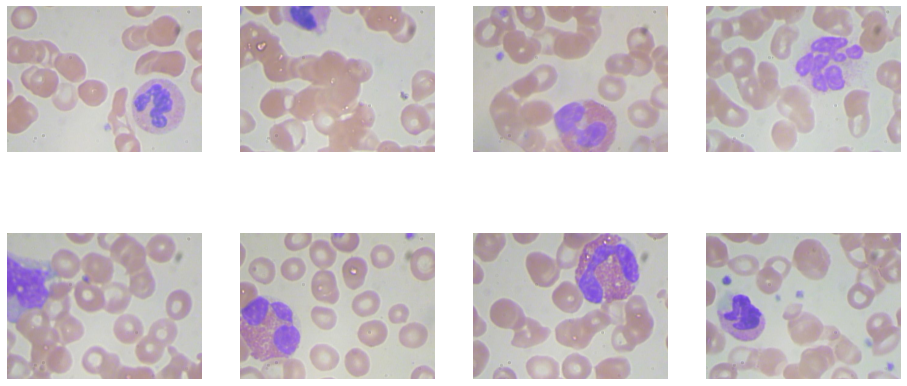

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_eosinophil_pic = [os.path.join(train_eosinophil_dir, fname) 
                for fname in train_eosinophil_names[pic_index-8:pic_index]]

# next_neutrophil_pic = [os.path.join(train_neutrophil_dir, fname) 
#                 for fname in train_neutrophil_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_eosinophil_pic): #+ next_neutrophil_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Agora, exiba um lote de 8 fotos de dente-de-leão e 8 fotos de grama. Você pode executar a célula novamente para ver um novo lote a cada vez:

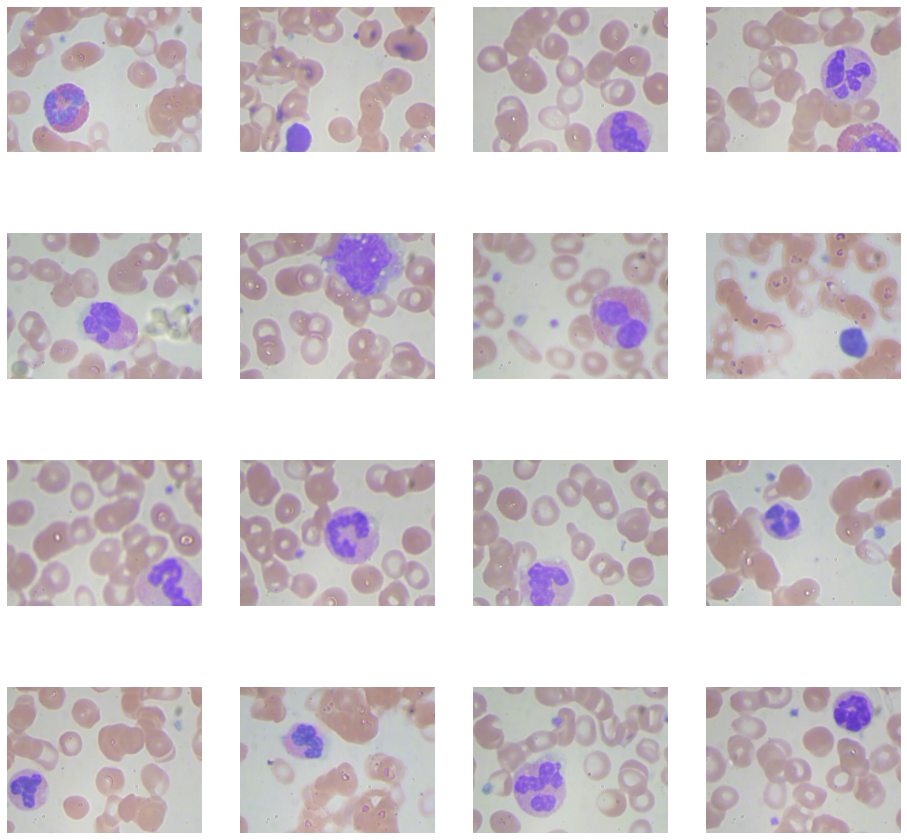

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_eosinophil_pic = [os.path.join(train_eosinophil_dir, fname) 
                for fname in train_eosinophil_names[pic_index-8:pic_index]]
next_neutrophil_pic = [os.path.join(train_neutrophil_dir, fname) 
                for fname in train_neutrophil_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_eosinophil_pic + next_neutrophil_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train/',  # This is the source directory for training images
        classes = ['eosinophil','neutrophil'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=10,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/valid/',  # This is the source directory for training images
        classes = ['eosinophil','neutrophil'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=5,
        # Use binary labels
        class_mode='binary',
        shuffle=False)



Found 383 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


Building the Model from Scratch
But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [ ]:
# Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               15360128  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=20,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/20
8/8 [==============================] - 2s 178ms/step - loss: 58.1704 - accuracy: 0.5169 - val_loss: 18.8622 - val_accuracy: 0.5500
Epoch 2/20
8/8 [==============================] - 1s 158ms/step - loss: 12.1482 - accuracy: 0.6080 - val_loss: 5.5101 - val_accuracy: 0.5500
Epoch 3/20
8/8 [==============================] - 1s 157ms/step - loss: 3.2834 - accuracy: 0.6070 - val_loss: 8.6152 - val_accuracy: 0.4500
Epoch 4/20
8/8 [==============================] - 1s 159ms/step - loss: 6.7182 - accuracy: 0.5290 - val_loss: 1.0867 - val_accuracy: 0.5500
Epoch 5/20
8/8 [==============================] - 1s 151ms/step - loss: 8.3671 - accuracy: 0.4132 - val_loss: 3.3814 - val_accuracy: 0.4500
Epoch 6/20
8/8 [==============================] - 1s 164ms/step - loss: 1.4230 - accuracy: 0.4201 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 7/20
8/8 [==============================] - 1s 151ms/step - loss: 0.6932 - accuracy: 0.3820 - val_loss: 0.6931 - val_accuracy: 0.5500
Epoch 8/20
8/8 [=

## Accuracy, ROC Curve, and AUC

Let's evaluate the accuracy of our model:



In [ ]:
model.evaluate(validation_generator)

13/13 [==============================] - 0s 35ms/step - loss: 0.6965 - accuracy: 0.3492


[0.6965106725692749, 0.3492063581943512]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

13/13 [==============================] - 1s 35ms/step


In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)

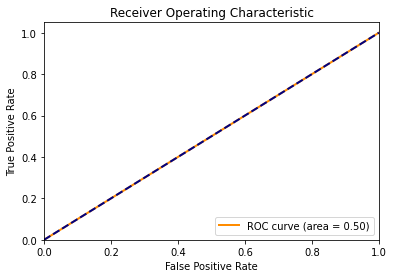

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Saving BloodImage_00345.jpg to BloodImage_00345.jpg
[0.49452344]
BloodImage_00345.jpg is a neutrophil


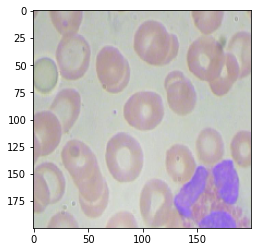

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.0001:
    print(fn + " is a eosinophil")
  else:
    print(fn + " is a neutrophil")